In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Diffusion

This file is to record the numerical method that could be applied to calculate the the diffusion.

In [2]:
Lz = 1
nz = 64
z = np.linspace(0, 1,  nz+1)
zc = (z[:-1] + z[1:])/2
theta = 0.5 * (2*zc - zc**2)
dTdz_f = lambda z: 1 - z

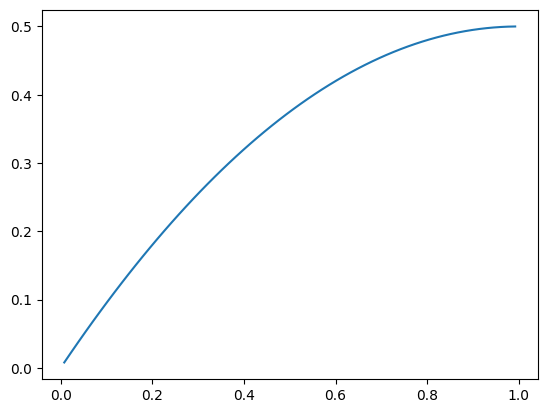

In [3]:
plt.plot(zc, theta)

In [4]:
np.gradient(theta, zc)

array([0.984375 , 0.9765625, 0.9609375, 0.9453125, 0.9296875, 0.9140625,
       0.8984375, 0.8828125, 0.8671875, 0.8515625, 0.8359375, 0.8203125,
       0.8046875, 0.7890625, 0.7734375, 0.7578125, 0.7421875, 0.7265625,
       0.7109375, 0.6953125, 0.6796875, 0.6640625, 0.6484375, 0.6328125,
       0.6171875, 0.6015625, 0.5859375, 0.5703125, 0.5546875, 0.5390625,
       0.5234375, 0.5078125, 0.4921875, 0.4765625, 0.4609375, 0.4453125,
       0.4296875, 0.4140625, 0.3984375, 0.3828125, 0.3671875, 0.3515625,
       0.3359375, 0.3203125, 0.3046875, 0.2890625, 0.2734375, 0.2578125,
       0.2421875, 0.2265625, 0.2109375, 0.1953125, 0.1796875, 0.1640625,
       0.1484375, 0.1328125, 0.1171875, 0.1015625, 0.0859375, 0.0703125,
       0.0546875, 0.0390625, 0.0234375, 0.015625 ])

dtdz(0) = (T(0.5)- T(-0.5))/1

In [5]:
theta0 = np.insert(theta, 0, 0)
zc0 = np.insert(zc, 0, 0)
print(theta[0]/zc[0])
np.gradient(theta0, zc0)

0.99609375


array([0.99609375, 0.9921875 , 0.9765625 , 0.9609375 , 0.9453125 ,
       0.9296875 , 0.9140625 , 0.8984375 , 0.8828125 , 0.8671875 ,
       0.8515625 , 0.8359375 , 0.8203125 , 0.8046875 , 0.7890625 ,
       0.7734375 , 0.7578125 , 0.7421875 , 0.7265625 , 0.7109375 ,
       0.6953125 , 0.6796875 , 0.6640625 , 0.6484375 , 0.6328125 ,
       0.6171875 , 0.6015625 , 0.5859375 , 0.5703125 , 0.5546875 ,
       0.5390625 , 0.5234375 , 0.5078125 , 0.4921875 , 0.4765625 ,
       0.4609375 , 0.4453125 , 0.4296875 , 0.4140625 , 0.3984375 ,
       0.3828125 , 0.3671875 , 0.3515625 , 0.3359375 , 0.3203125 ,
       0.3046875 , 0.2890625 , 0.2734375 , 0.2578125 , 0.2421875 ,
       0.2265625 , 0.2109375 , 0.1953125 , 0.1796875 , 0.1640625 ,
       0.1484375 , 0.1328125 , 0.1171875 , 0.1015625 , 0.0859375 ,
       0.0703125 , 0.0546875 , 0.0390625 , 0.0234375 , 0.015625  ])

In [6]:
np.gradient(theta0, zc0, edge_order=2)

array([1.       , 0.9921875, 0.9765625, 0.9609375, 0.9453125, 0.9296875,
       0.9140625, 0.8984375, 0.8828125, 0.8671875, 0.8515625, 0.8359375,
       0.8203125, 0.8046875, 0.7890625, 0.7734375, 0.7578125, 0.7421875,
       0.7265625, 0.7109375, 0.6953125, 0.6796875, 0.6640625, 0.6484375,
       0.6328125, 0.6171875, 0.6015625, 0.5859375, 0.5703125, 0.5546875,
       0.5390625, 0.5234375, 0.5078125, 0.4921875, 0.4765625, 0.4609375,
       0.4453125, 0.4296875, 0.4140625, 0.3984375, 0.3828125, 0.3671875,
       0.3515625, 0.3359375, 0.3203125, 0.3046875, 0.2890625, 0.2734375,
       0.2578125, 0.2421875, 0.2265625, 0.2109375, 0.1953125, 0.1796875,
       0.1640625, 0.1484375, 0.1328125, 0.1171875, 0.1015625, 0.0859375,
       0.0703125, 0.0546875, 0.0390625, 0.0234375, 0.0078125])

Check the document of numpy.gradient and find out the method of inhomogeneous high order finite difference method could be find in this [article](https://www.ams.org/journals/mcom/1988-51-184/S0025-5718-1988-0935077-0/S0025-5718-1988-0935077-0.pdf) {cite}`fornbergGenerationFiniteDifference`.

Given data $f_i$ at $x$-coordinates $\alpha_0, \alpha_1, \dots, \alpha_N$, we want to calculate the highest M-th order derivative of given data array. The problem is to find all the weights such that the approximations
$$
\left.\frac{\mathrm{d}^m f}{\mathrm{d}x^m}\right|_{x=x_0} \approx \sum_{\nu=0}^n \delta_{n, \nu}^m f(\alpha_\nu), m = 0, 1, \dots, M; n=m, m+1, \dots, N,
$$
become of optimal formal order of accuracy (in general of order $n-m+1$, although it can be higher in special cases){cite}`fornbergGenerationFiniteDifference`.


In [7]:
def params_finite_difference(M:int, x0:float, x:np.array):
    """_summary_

    Args:
        M (int): order of derivative.
        x0 (float): _description_
        x (np.array): _description_
    """
    N = x.shape[0]-1
    
    params = np.empty(shape=(M+1, N+1, N+1)) # indices (m, n, nu)
    params[:] = np.nan
    
    params[0, 0, 0] = 1
    c1 = 1
    for n in range(1, N+1):
        c2 = 1
        for nu in range(n):
            c3 = x[n] - x[nu]
            c2 = c2 * c3
            if n<=M: params[n, n-1, nu] = 0
            for m in range(min(n, M)+1):
                params[m, n, nu] = ((x[n] - x0) * params[m, n-1, nu] - m * params[m-1, n-1, nu]) / c3
        
        for m in range(min(n, M)+1):
            params[m, n, n] = c1/c2 * (m*params[m-1, n-1, n-1] - (x[n-1] - x0) * params[m, n-1, n-1])
        
        c1 = c2
    
    return params
    

In [8]:
dx = zc0[1:] - zc0[:-1]
dx1 = dx[0]
dx2 = dx[0] + dx[1]
# dx1 = 1
# dx2 =2

a = np.array([
    [1, 1, 1],
    [0, dx1, dx2],
    [0, dx1**2, dx2**2]
])
b = np.array([
    [0],
    [1],
    [0]
])
np.linalg.solve(a, b)

array([[-170.66666667],
       [ 192.        ],
       [ -21.33333333]])

In [9]:
x = np.array([0, 1, -1, 2, -2])
x0 = 0
M = 2
params = params_finite_difference(M, x0, x)
print(params)

[[[ 1. nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[ 0. nan nan nan nan]
  [-1.  1. nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [ 0.  0. nan nan nan]
  [-2.  1.  1. nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]]


In [10]:
theta_ubc = np.insert(theta, -1, theta[-1])
zc_ubc = np.insert(zc, -1, zc[-1] + zc[-1]-zc[-2])
dTdz_tmp = (theta_ubc[1:] - theta_ubc[:-1])/(zc_ubc[1:] - zc_ubc[:-1])
dTdz_w = np.insert(dTdz_tmp, 0, np.gradient(theta0, zc0, edge_order=2)[0])
diff = (dTdz_w[1:] - dTdz_w[:-1])/(z[1:] - z[:-1])
print(diff)

[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
 -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
 -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
 -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
 -1.  -1.  -1.  -1.  -1.  -1.  -1.5 -0.5]
